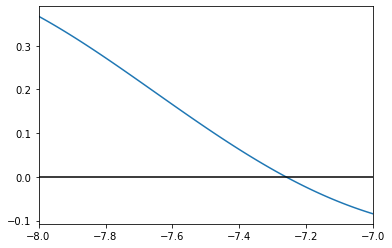

(-7.261009799133396, array([-7.5       , -7.23737389, -7.25887892, -7.26081651, -7.26099226,
       -7.26100821, -7.26100965, -7.26100979, -7.2610098 , -7.2610098 ,
       -7.2610098 , -7.2610098 , -7.2610098 , -7.2610098 , -7.2610098 ,
       -7.2610098 , -7.2610098 , -7.2610098 , -7.2610098 , -7.2610098 ,
       -7.2610098 ]), [0.11262803067061636, 0.009551751903624575, 0.0008749540546453688, 7.947867913077333e-05, 7.213990880786114e-06, 6.547410364432515e-07, 5.9423841042294256e-08, 5.393263197150944e-09, 4.894886718176394e-10, 4.442557433037564e-11, 4.032205125348298e-12, 3.66123797945761e-13, 3.337607967779377e-14, 3.0531133177191805e-15, 1.249000902703301e-16, 1.249000902703301e-16, 1.249000902703301e-16, 1.249000902703301e-16, 1.249000902703301e-16, 1.249000902703301e-16, 1.249000902703301e-16])


(1e-05, 0.0015)

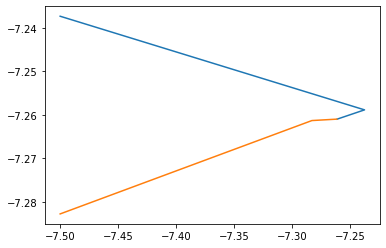

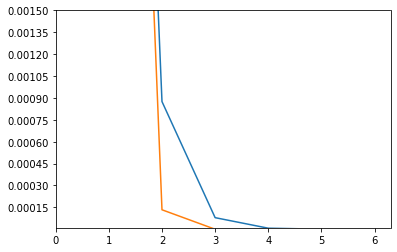

In [98]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from matplotlib.ticker import MaxNLocator

x = sp.symbols('x')
#al escribir x en una funcion de sympy lo interpreta como variable
ejeX = np.linspace(-8,-7, 100)
#ejeY = np.arange(-10, 10, 0.1)

#LA FUNCION
def f(x):
    return (np.sin(x)*(0.5*np.cos(x)-0.4)-0.1)


#LA DERIVADA
def df(x):
    return derivative(f,x,dx=1e-4 )

#LA SEGUNDA DERIVADA
def dfSegunda(x):
    return derivative(f,x,dx=1e-4,n=2)



plt.plot(ejeX,f(ejeX))
plt.xlim(left=-8,right=-7)
#plt.plot(ejeX, df(ejeX))
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")
plt.show()


def falsepos(x0,x1,maxit,tol):
    i=0
    res=[]
    sols=[]
    sols.append(x0)
    res.append(f(x0))
    x=x0
    xp=x1
    q=f(x)
    while i<maxit and abs(res[-1])>tol:
        aux=x
        x=aux-q*(x-xp)/(q-f(xp))
        q=f(x)
        res.append(q)
        sols.append(x)
        if not np.sign(q)==np.sign(f(aux)):
            xp=aux
        i+=1
        
    return np.asarray(sols), res

def newton(x0,maxit,tol):
    i=0
    res=[]
    sols=[]
    q=f(x0)
    res.append(q)
    sols.append(x0)
    x=x0
    while i<maxit and abs(res[-1])>tol:
        x-=q/df(x)
        q=f(x)
        res.append(q)
        sols.append(x)
        i+=1
        
    return np.asarray(sols), res


def newtonFalsi(a,b,maxit,v0,tol):
 i=0
 res=[]
 sols=[]
 res.append(f(v0))
 sols.append(v0)


 while i<maxit and abs(res[-1])>tol:
    
    segDerivadaDeA = dfSegunda(a)
    segDerivadaDeB = dfSegunda(b)

    pendienteFalsi = (f(b) - f(a)) / (b-a)
    pendienteNewton = df(v0)
    
    sumaSegDerivadas= segDerivadaDeA + segDerivadaDeB

    pendienteNF = ((segDerivadaDeA*pendienteNewton) + (segDerivadaDeB * pendienteFalsi)) / sumaSegDerivadas
     
     
    v0 = v0 - (f(v0)/pendienteNF) 

    q=f(v0)
    res.append(abs(q))
    sols.append(v0)

    i+=1

    if np.sign(f(a))==np.sign(f(v0)): a= v0
    else: b = v0



 return v0,np.asarray(sols),res

 

valor,sols,res=newtonFalsi(-7.5,-7,10,-7.5,1e-7);
sols2,res2=newton(-7.5,10,1e-7)

plt.plot(sols[:-1],np.roll(sols,-1)[:-1])
plt.plot(sols2[:-1],np.roll(sols2,-1)[:-1])



print(newtonFalsi(-7.5,-7,20,-7.5,0))
#print(newtonFalsi(-7.5,-7,3,-7.5,0.00001))

ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(range(0,len(res)),res)
plt.plot(range(0,len(res2)),res2)
plt.xlim(left=0)
plt.ylim(top=0.0015)
plt.ylim(bottom=0.00001)


In [99]:
def newtonFalsi(a,b,maxit,v0,tol):
 i=0
 res=[]
 res.append(v0)
 while i<maxit:
    
    segDerivadaDeA = dfSegunda(a)
    segDerivadaDeB = dfSegunda(b)

    pendienteFalsi = (f(b) - f(a)) / (b-a)
    pendienteNewton = df(v0)
    
    sumaSegDerivadas= segDerivadaDeA + segDerivadaDeB

    pendienteNF = ((segDerivadaDeA*pendienteNewton) + (segDerivadaDeB * pendienteFalsi)) / sumaSegDerivadas
     
     
    v0 = v0 - f(v0)/pendienteNF 

    q=f(v0)
    res.append(v0)

    i+=1

    if f(a) > 0 and f(v0) > 0: a= v0
    elif f(a) < 0 and f(v0) < 0: a=v0
    else: b = v0



 return v0,res